<a href="https://colab.research.google.com/github/uervitonsantos/simula-dados-carteira-investimentos/blob/main/Simula_dados_de_opera%C3%A7%C3%B5es_em_cateira_de_investimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import random
import os
from datetime import datetime, timedelta

In [ ]:
VALE3 = "VALE3 - VALE S.A."
ITUB4 = "ITUB4 - Itaú Unibanco"
PETR4 = "PETR4 - Petroleo Brasileiro SA"
BBAS3 = "BBAS3 - Banco do Brasil SA"
CXSE3 = "CXSE3 - Caixa Seguridade"

In [ ]:
NUM_EVENTO = random.randint(100, 119)
ATIVO_NOME = f'{CXSE3}'
MENOR_PRECO = 13.90
MAIOR_PRECO = 16.75

In [ ]:
# Função para gerar um valor formatado como "R$ 0,00"
def format_brl(value):
    return f'R$ {value:,.2f}'.replace('.', '#').replace(',', '.').replace('#', ',')

# Geração de mais de 100 eventos simulados para o ativo selecionado no período de um ano
num_events = int(f'{NUM_EVENTO}')
start_date = datetime.today()
date_range = [start_date - timedelta(days=random.randint(0, 365)) for _ in range(num_events)]
date_range.sort(reverse=True)  # datas mais recentes primeiro

In [ ]:
# Dados simulados
data = []
for date in date_range:
    tipo = random.choice(["Compra", "Venda"])
    quantidade = random.choice([100, 200])
    preco_unitario = round(random.uniform(MENOR_PRECO, MAIOR_PRECO), 2)  # preço típico do ATIVO selecionado em BRL
    valor_operacao = round(preco_unitario * quantidade, 2)
    row = [
        tipo,
        date.strftime('%d/%m/%Y'),
        f'{ATIVO_NOME}',
        quantidade,
        format_brl(preco_unitario),
        format_brl(valor_operacao)
    ]
    data.append(row)

In [ ]:
# Criação do DataFrame com as colunas especificadas
df = pd.DataFrame(data, columns=[
    "Entrada/Saída", "Data", "Produto", "Quantidade", "Preço unitário", "Valor da Operação"
])

df.head()

,Entrada/Saída,Data,Produto,Quantidade,Preço unitário,Valor da Operação
0,Venda,26/04/2025,CXSE3 - Caixa Seguridade,100,"R$ 15,49","R$ 1.549,00"
1,Compra,21/04/2025,CXSE3 - Caixa Seguridade,200,"R$ 14,67","R$ 2.934,00"
2,Compra,20/04/2025,CXSE3 - Caixa Seguridade,100,"R$ 15,29","R$ 1.529,00"
3,Venda,19/04/2025,CXSE3 - Caixa Seguridade,100,"R$ 15,98","R$ 1.598,00"
4,Compra,16/04/2025,CXSE3 - Caixa Seguridade,100,"R$ 15,26","R$ 1.526,00"


In [ ]:
#-----------------------------------------------------------------------------------------
# Esse código garante que se o arquivo não existir, ele será criado com cabeçalhos.
#Se o arquivo já existir, os novos dados serão acrescentados sem duplicar os cabeçalhos.
#-----------------------------------------------------------------------------------------

file_path = '/content/drive/MyDrive/datasets/dados-acoes/carteira-de-ativos.csv'

# Verifica se o arquivo já existe para decidir se deve escrever o cabeçalho
write_header = not os.path.exists(file_path)

# Salvar em CSV no modo append
df.to_csv(file_path, mode='a', header=write_header, index=False)

print("✅ Dados acrescentados em 'carteira-de-ativos.csv'.")

✅ Dados acrescentados em 'carteira-de-ativos.csv'.


In [12]:
df3 = pd.read_csv(f'/content/drive/MyDrive/datasets/dados-acoes/carteira-de-ativos.csv', sep=",")
df3.head(3)

,Entrada/Saída,Data,Produto,Quantidade,Preço unitário,Valor da Operação
0,Compra,10/06/2025,VALE3 - VALE S.A.,200,"R$ 4.221,54","R$ 844.308,00"
1,Compra,07/06/2025,VALE3 - VALE S.A.,100,"R$ 2.159,74","R$ 215.974,00"
2,Compra,30/05/2025,VALE3 - VALE S.A.,100,"R$ 2.766,14","R$ 276.614,00"


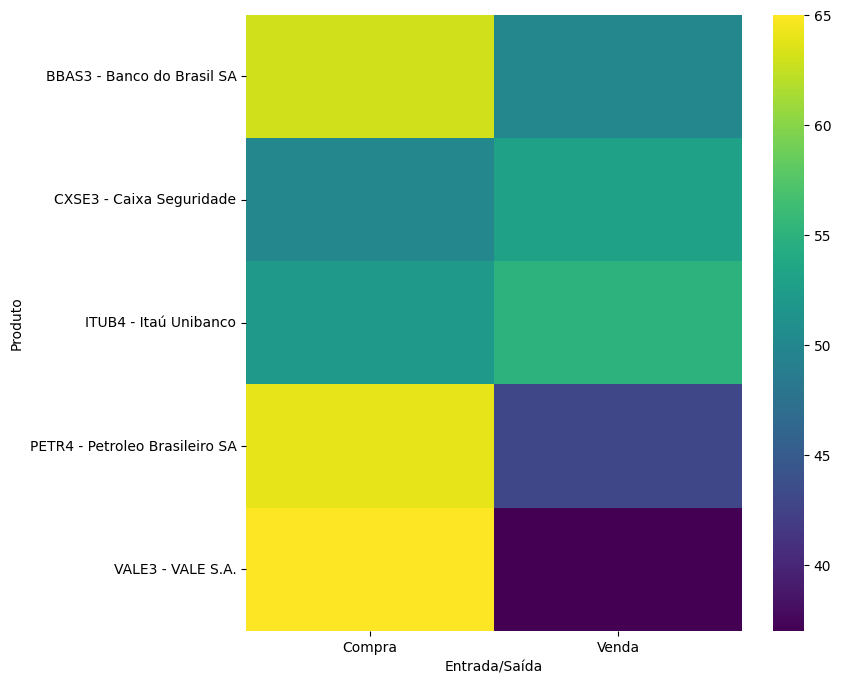

In [15]:
# @title Entrada/Saída vs Produto

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Produto'].value_counts()
    for x_label, grp in df3.groupby('Entrada/Saída')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Entrada/Saída')
_ = plt.ylabel('Produto')

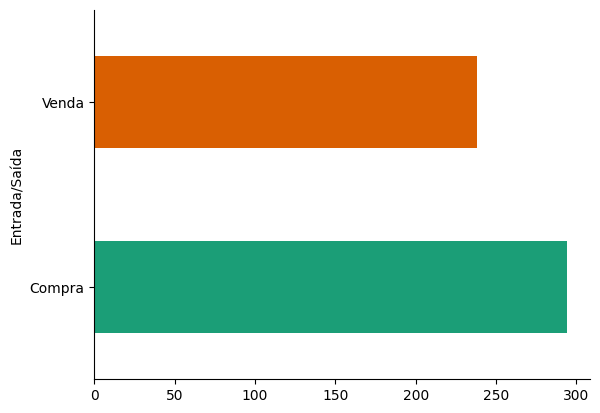

In [14]:
# @title Entrada/Saída

from matplotlib import pyplot as plt
import seaborn as sns
df3.groupby('Entrada/Saída').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

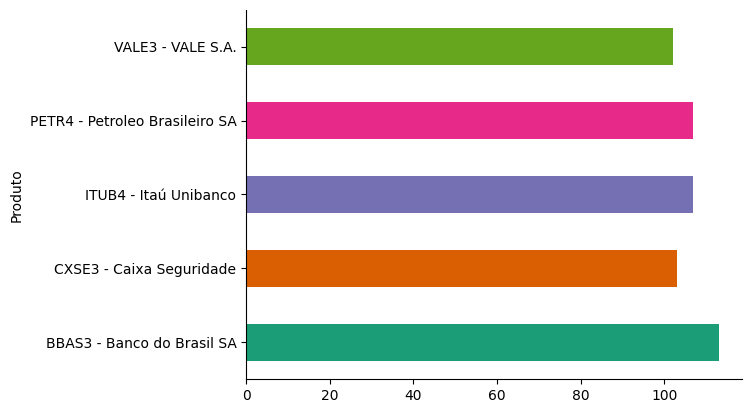

In [13]:
# @title Produto

from matplotlib import pyplot as plt
import seaborn as sns
df3.groupby('Produto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)